In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
KEYFILE = "key.csv"
df_key = pd.read_csv("..\data\{}".format(KEYFILE))

def tweak_key(df):
    return(df
           .drop(df.index[df.ID == 2018])
           .assign(ID=lambda df_: df_.ID.astype(str))
           .melt(id_vars="ID")
           .rename(columns={"variable": "session",
                            "value": "condition"})
           .assign(session=lambda df_: df_.session.astype("category"),
                   condition=lambda df_: df_.condition.astype("category"))
          )

KEYFILE = "key.csv"
df_key = pd.read_csv("..\data\{}".format(KEYFILE))
key = tweak_key(df_key)

In [8]:
AFFECTFILE = "..\\data\\activation_affect.csv"
df = pd.read_csv(AFFECTFILE, sep=",")

def calc_activation(alert, energ, tired, calm):
    
    return (alert + energ + 10 - (tired + calm)) / 4

def calc_affect(happy, satis, sad, tense):
    
    return (happy + satis + 10 - (sad + tense)) / 4

def tweak_actaff(df, key):
    
    x_cols = [col for col in df.columns if ".x" in col]
    y_cols = [col for col in df.columns if ".y" in col]
    cols_to_keep = ["ID", "session"] + x_cols + y_cols
    
    print(cols_to_keep)
    
    return(df
           .assign(ID=lambda df_: df_.ID.astype(int))
           .assign(ID=lambda df_: df_.ID.astype(str))
           .replace({"2nd test": "T2",
                     "3rd test": "T3"})
           .loc[:,cols_to_keep]
           .rename(columns = lambda c: c.replace('.', '_'))
           .assign(activation_x = lambda df_: calc_activation(df_.alert_x, df_.energetic_x, df_.tired_x, df_.calm_x),
                   activation_y = lambda df_: calc_activation(df_.alert_y, df_.energetic_y, df_.tired_y, df_.calm_y),
                   affect_x = lambda df_: calc_affect(df_.happy_x, df_.satisfied_x, df_.sad_x, df_.tense_x),
                   affect_y = lambda df_: calc_affect(df_.happy_y, df_.satisfied_y, df_.sad_y, df_.tense_y))
           .assign(activation_diff = lambda df_: df_.activation_y - df_.activation_x,
                   affect_diff = lambda df_: df_.affect_y - df_.affect_x)
           .merge(key)
                  )

actaff = tweak_actaff(df, key)

['ID', 'session', 'attentive.x', 'tired.x', 'sad.x', 'satisfied.x', 'lazy.x', 'calm.x', 'happy.x', 'anxious.x', 'alert.x', 'nervous.x', 'energetic.x', 'depressed.x', 'tense.x', 'hungry.x', 'motivated.x', 'attentive.y', 'tired.y', 'sad.y', 'satisfied.y', 'lazy.y', 'calm.y', 'happy.y', 'anxious.y', 'alert.y', 'nervous.y', 'energetic.y', 'depressed.y', 'tense.y', 'hungry.y', 'motivated.y']


In [9]:
actaff

,ID,session,attentive_x,tired_x,sad_x,satisfied_x,lazy_x,calm_x,happy_x,anxious_x,...,tense_y,hungry_y,motivated_y,activation_x,activation_y,affect_x,affect_y,activation_diff,affect_diff,condition
0,2009,T2,3,5,3,3,2,4,3,2,...,2,5,3,0.75,2.50,2.75,3.00,1.75,0.25,CS
1,2036,T3,3,3,1,3,2,2,3,2,...,2,4,3,2.75,2.75,3.25,3.25,0.00,0.00,CS
2,2054,T2,2,1,1,3,1,4,4,1,...,2,1,3,2.50,2.75,3.75,3.00,0.25,-0.75,CS
3,2063,T2,4,3,2,2,2,3,1,1,...,3,3,4,2.50,2.75,2.50,2.25,0.25,-0.25,CS
4,2072,T3,3,2,1,3,1,4,3,1,...,2,2,4,2.50,2.50,3.25,3.25,0.00,0.00,CS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,7096,T2,2,2,1,2,2,3,2,1,...,2,3,4,2.25,2.50,3.00,3.25,0.25,0.25,DCXS
122,7108,T2,3,1,1,4,1,4,4,1,...,1,2,3,2.75,3.25,3.75,3.50,0.50,-0.25,DCXS
123,8049,T3,2,4,1,3,2,2,3,1,...,2,4,2,2.00,2.00,3.50,3.00,0.00,-0.50,DCXS
124,9068,T2,3,1,1,3,2,4,3,1,...,1,1,2,2.75,2.50,3.50,3.50,-0.25,0.00,DCXS


In [40]:
actaff_red = actaff.loc[:, ("ID", "session", "condition", "activation_x", "activation_y", "activation_diff", "affect_x", "affect_y", "affect_diff")]

In [41]:
actaff_red

,ID,session,condition,activation_x,activation_y,activation_diff,affect_x,affect_y,affect_diff
0,2009,T2,CS,0.75,2.50,1.75,2.75,3.00,0.25
1,2036,T3,CS,2.75,2.75,0.00,3.25,3.25,0.00
2,2054,T2,CS,2.50,2.75,0.25,3.75,3.00,-0.75
3,2063,T2,CS,2.50,2.75,0.25,2.50,2.25,-0.25
4,2072,T3,CS,2.50,2.50,0.00,3.25,3.25,0.00
...,...,...,...,...,...,...,...,...,...
121,7096,T2,DCXS,2.25,2.50,0.25,3.00,3.25,0.25
122,7108,T2,DCXS,2.75,3.25,0.50,3.75,3.50,-0.25
123,8049,T3,DCXS,2.00,2.00,0.00,3.50,3.00,-0.50
124,9068,T2,DCXS,2.75,2.50,-0.25,3.50,3.50,0.00


In [78]:
act_df = (actaff_red
.pivot(index="ID", columns="condition", values=["activation_x", "activation_y"])

# act_df.columns = act_df.columns.map('-'.join).str.strip('|')
.drop(("activation_x", "DCS"), axis=1)
.drop(("activation_y", "DCS"), axis=1)
.drop(("activation_x", "DCXS"), axis=1)
.drop(("activation_y", "DCXS"), axis=1)
          .dropna()
)

act_df.columns = act_df.columns.map('-'.join).str.strip('|')
act_df.to_csv("..\\results\\activation_sugar.csv")

In [79]:
aff_df = (actaff_red
.pivot(index="ID", columns="condition", values=["affect_x", "affect_y"])

# act_df.columns = act_df.columns.map('-'.join).str.strip('|')
.drop(("affect_x", "DCS"), axis=1)
.drop(("affect_y", "DCS"), axis=1)
.drop(("affect_x", "DCXS"), axis=1)
.drop(("affect_y", "DCXS"), axis=1)
          .dropna()
)

aff_df.columns = aff_df.columns.map('-'.join).str.strip('|')
aff_df.to_csv("..\\results\\affect_sugar.csv")

In [ ]:
a

In [29]:




mean = (actaff
 .groupby(by="condition")
 .mean(numeric_only=True)
)

sem = (actaff
 .groupby(by="condition")
 .sem(numeric_only=True)
)

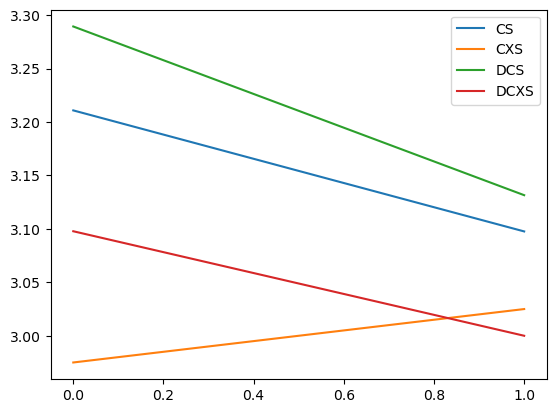

In [38]:
f, ax = plt.subplots()
ax.plot([mean.affect_x, mean.affect_y], label=(mean.index))
ax.legend(loc="upper right")

[1.75, 0.0, 0.25, 0.25, 0.0, -0.5, 0.25, -0.75, 0.25, 0.75, 0.5, -0.25, 0.0, 0.5, 1.75, 0.0, 0.25, 0.25, 0.0, -0.5, 0.75, 0.0, -0.25, -0.25, 0.25, -0.5, -0.25, 0.75, -0.5, 0.5, 0.5, 1.0, 0.0, -1.0, 0.25, 0.75, 1.5, -0.5, -0.25, 0.0, 0.5, 0.75, -0.75, 1.0, 0.25, -0.5, 0.25, 1.0, -0.5, -1.0, -0.75, 0.75, 0.0, 0.25, -0.5, -0.5, 0.0, 0.0, 0.75, -1.0, 0.5, 0.25, 0.75, 0.5]


C:\Users\jmc010\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: >

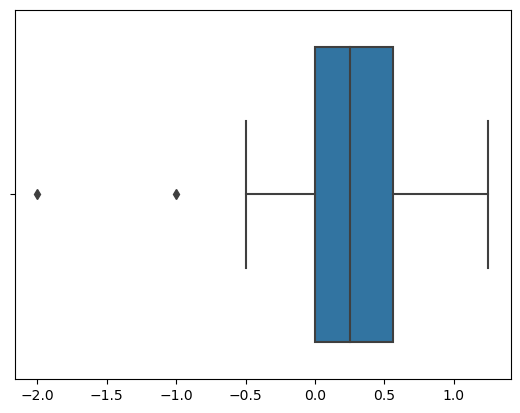

In [13]:
def get_diff_subset(df, condition, parameter):
    
    return(df
           .query("condition == @condition")[parameter]
           .tolist()
           )
    
print(get_diff_subset(actaff, "CS", "activation_diff"))
    
f, ax = plt.subplots()
sns.boxplot(get_diff_subset(actaff, "CXS", "activation_diff"),
               ax=ax)